In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"
# Read the City and Ride Data
city_date = pd.read_csv(city_data_to_load)
ride_date = pd.read_csv(ride_data_to_load)

df_city = pd.DataFrame(city_date)
df_ride = pd.DataFrame(ride_date)

In [3]:
df_city.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
df_ride.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
df_main = pd.merge(df_city,df_ride,on='city')
# Display the data table for preview
df_main.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [6]:
# Average Fare by city
city_fare = df_main[['city','fare']]
avg_fare = city_fare.groupby('city').mean()
avg_fare.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [7]:
# Total Rides per City
ride_city = df_main[['city','ride_id']]
count_ride = ride_city.groupby('city').count()
count_ride.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [8]:
count_driver = df_main[['city','driver_count']].drop_duplicates()
count_driver.head()

,city,driver_count
0,Richardfort,38
28,Williamsstad,59
51,Port Angela,67
70,Rodneyfort,34
93,West Robert,39


In [9]:
city_type = df_main[['city','type']].drop_duplicates()
city_type.head()

,city,type
0,Richardfort,Urban
28,Williamsstad,Urban
51,Port Angela,Urban
70,Rodneyfort,Urban
93,West Robert,Urban


In [10]:
# Combine Data Frames
merge_fare_ride = pd.merge(avg_fare,count_ride,on='city')
merge_driver = pd.merge(merge_fare_ride,count_driver,on='city')
df_merge = pd.merge(merge_driver,city_type,on='city')
df_merge = df_merge.rename(columns={'fare':'Fare Average',
                         'ride_id':'Ride Count',
                         'driver_count':'Driver Count',
                         'type':'City Type',
                         'city':'City'})
df_merge.head()

,City,Fare Average,Ride Count,Driver Count,City Type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


In [11]:
df_urban = df_merge.loc[df_merge['City Type']=='Urban']
df_suburban = df_merge.loc[df_merge['City Type']=='Suburban']
df_rural = df_merge.loc[df_merge['City Type']=='Rural']

## Bubble Plot of Ride Sharing Data

In [12]:
# Obtain the x and y coordinates for each of the three city types

# Urban coordinates
urban_s = list(df_urban['Driver Count'])
urban_y = list(df_urban['Ride Count'])
urban_x = list(df_urban['Fare Average'])

# Suburban coordinates
suburban_s = list(df_suburban['Driver Count'])
suburban_y = list(df_suburban['Ride Count'])
suburban_x = list(df_suburban['Fare Average'])

# Rural coordinates
rural_s = list(df_rural['Driver Count'])
rural_y = list(df_rural['Ride Count'])
rural_x = list(df_rural['Fare Average'])

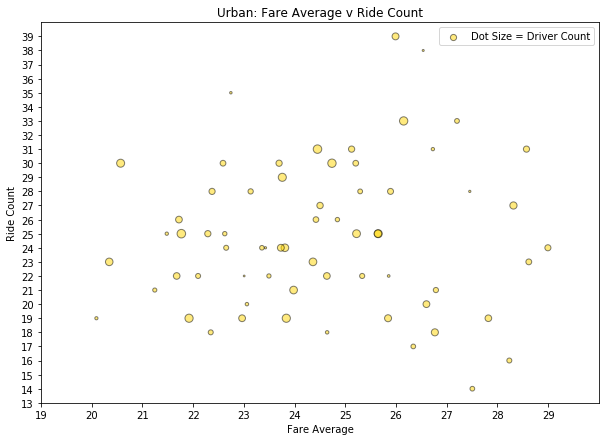

In [13]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7
plt.rcParams["figure.figsize"] = fig_size
# Build the scatter plots for each city types
# Urban Scatter Plot
plt.scatter(urban_x,urban_y,s=urban_s,c='gold',edgecolor='black',alpha=0.5,label='Dot Size = Driver Count')
plt.ylabel('Ride Count')
plt.xlabel('Fare Average')
plt.title('Urban: Fare Average v Ride Count')
plt.legend(loc='best')
plt.xlim(19,30)
plt.xticks(np.arange(19,30,1))
plt.ylim(13,40)
plt.yticks(np.arange(13,40,1))


plt.show()

In [ ]:
# Build the scatter plots for each city types
# suburban Scatter Plot
plt.scatter(suburban_x,suburban_y,s=suburban_s,c='lightskyblue',edgecolor='black',alpha=0.5,label='Dot Size = Driver Count')
plt.ylabel('Ride Count')
plt.xlabel('Fare Average')
plt.title('Suburban: Fare Average v Ride Count')
plt.legend(loc='best')
plt.xlim(24,38)
plt.xticks(np.arange(24,38,1))
plt.ylim(8,29)
plt.yticks(np.arange(8,29,1))
plt.show()

In [ ]:
# Build the scatter plots for each city types
# suburban Scatter Plot
plt.scatter(rural_x,rural_y,s=rural_s,c='lightcoral',edgecolor='black',alpha=0.5,label='Dot Size = Driver Count')
plt.ylabel('Ride Count')
plt.xlabel('Fare Average')
plt.title('Rural: Fare Average v Ride Count')
plt.legend(loc='best')
plt.xlim(22,44)
plt.xticks(np.arange(22,44,1))
plt.ylim(1,13)
plt.yticks(np.arange(1,13,1))
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents
total_fare = df_main['fare'].sum()

# Rural Fare
fare_type = df_main.loc[df_main['type']=='Rural']
fare_rural = fare_type['fare'].sum()

# Urban Fare
fare_type = df_main.loc[df_main['type']=='Urban']
fare_urban = fare_type['fare'].sum()

# Suburban Fare
fare_type = df_main.loc[df_main['type']=='Suburban']
fare_suburban = fare_type['fare'].sum()



In [ ]:
# Percentages
percent_rural = (fare_rural / total_fare)
percent_suburban = (fare_suburban / total_fare)
percent_urban = (fare_urban / total_fare)

# Build Pie Chart
labels = ['Urban','Rural','Suburban']
sizes = [percent_urban,percent_rural,percent_suburban]
colors = ['lightskyblue','gold','lightcoral']
explode = (0.1,0,0)

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=100)
plt.title('Total Fares by City Type')
# Save Figure
plt.savefig('total_fare.png')
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents
total_ride = df_main['ride_id'].count()

# Rural Rides
ride_type = df_main.loc[df_main['type']=='Rural']
ride_rural = ride_type['ride_id'].count()

# Urban Rides
ride_type = df_main.loc[df_main['type']=='Urban']
ride_urban = ride_type['ride_id'].count()

# Suburban Rides
ride_type = df_main.loc[df_main['type']=='Suburban']
ride_suburban = ride_type['ride_id'].count()


In [ ]:
# Percentages
percent_rural = (ride_rural / total_ride)
percent_suburban = (ride_suburban / total_ride)
percent_urban = (ride_urban / total_ride)

# Build Pie Chart
labels = ['Urban','Rural','Suburban']
sizes = [percent_urban,percent_rural,percent_suburban]
colors = ['lightskyblue','gold','lightcoral']
explode = (0.1,0,0)

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=100)
plt.title('Total Rides by City Type')
# Save Figure
plt.savefig('total_rides.png')
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Ride Percents
unique_driver = df_main[['driver_count','type']].drop_duplicates()
total_driver = unique_driver['driver_count'].sum()

# Rural Rides
driver_type = unique_driver.loc[unique_driver['type']=='Rural']
driver_rural = driver_type['driver_count'].sum()

# Urban Rides
driver_type = unique_driver.loc[unique_driver['type']=='Urban']
driver_urban = driver_type['driver_count'].sum()

# Suburban Rides
driver_type = unique_driver.loc[unique_driver['type']=='Suburban']
driver_suburban = driver_type['driver_count'].sum()


In [ ]:
# Percentages
percent_rural = (driver_rural / total_driver)
percent_suburban = (driver_suburban / total_driver)
percent_urban = (driver_urban / total_driver)

# Build Pie Chart
labels = ['Urban','Rural','Suburban']
sizes = [percent_urban,percent_rural,percent_suburban]
colors = ['lightskyblue','gold','lightcoral']
explode = (0.1,0,0)

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=100)
plt.title('Total Drivers by City Type')
# Save Figure
plt.savefig('total_drivers.png')
# Show Figure
plt.show()

# Observable Trends
* Most business comes from the Urban Areas
* Fare Average tends to be higher in the Rural Areas
* The lower the Driver count the lower the Ride count the greater the Fare